In [9]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(harmony))
suppressMessages(library(Nebulosa))
suppressMessages(library(ggpubr))
suppressMessages(library(Ipaper))
suppressMessages(library(phateR))
suppressMessages(library(viridis))
suppressMessages(library(SeuratDisk))
suppressMessages(library(SingleCellExperiment))
suppressMessages(library(destiny))
suppressMessages(library(plotly))

source("../../utils/trajectory_ArchR.R")

In [6]:
obj.human <- readRDS("../../../IntegrativeAnalysis/Fibroblast/data/coembed/coembed.annotation.trajectory.Rds")

In [7]:
obj.human

An object of class Seurat 
221802 features across 38610 samples within 3 assays 
Active assay: RNA (28933 features, 2000 variable features)
 2 other assays present: peaks, GeneActivity
 7 dimensional reductions calculated: pca, umap, harmony, umap_harmony, umap_harmony_v2, phate, dm

In [13]:
trajGEX <- getTrajectoryA(obj.human,
                         name = "SCARA5_Myofib_dm",
                         log2Norm = TRUE,
                        smoothWindow = 11,
                         assay = "RNA",
                           slot = "data")

Smoothing...



In [12]:
trajGEX

class: SummarizedExperiment 
dim: 28933 100 
metadata(1): Params
assays(2): smoothMat mat
rownames(28933): z:FAM87B z:LINC01128 ... z:AP001062.2 z:PNMA6F
rowData names(3): seqnames idx name
colnames(100): T.0_1 T.1_2 ... T.98_99 T.99_100
colData names(0):

In [15]:
rownames(trajGEX) <- stringr::str_split_fixed(rownames(trajGEX), ":", 2)[ ,2]

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-2eae6354e7b653-Date-2022-02-24_Time-14-54-59.log
If there is an issue, please report to github with logFile!

useSeqnames is NULL or greater than 1 with a Sparse.Assays.Matrix trajectory input.

2022-02-24 14:54:59 : 

force=FALSE thus continuing with subsetting useSeqnames = z

2022-02-24 14:54:59 : 

Preparing Main Heatmap..

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-2eae6354e7b653-Date-2022-02-24_Time-14-54-59.log



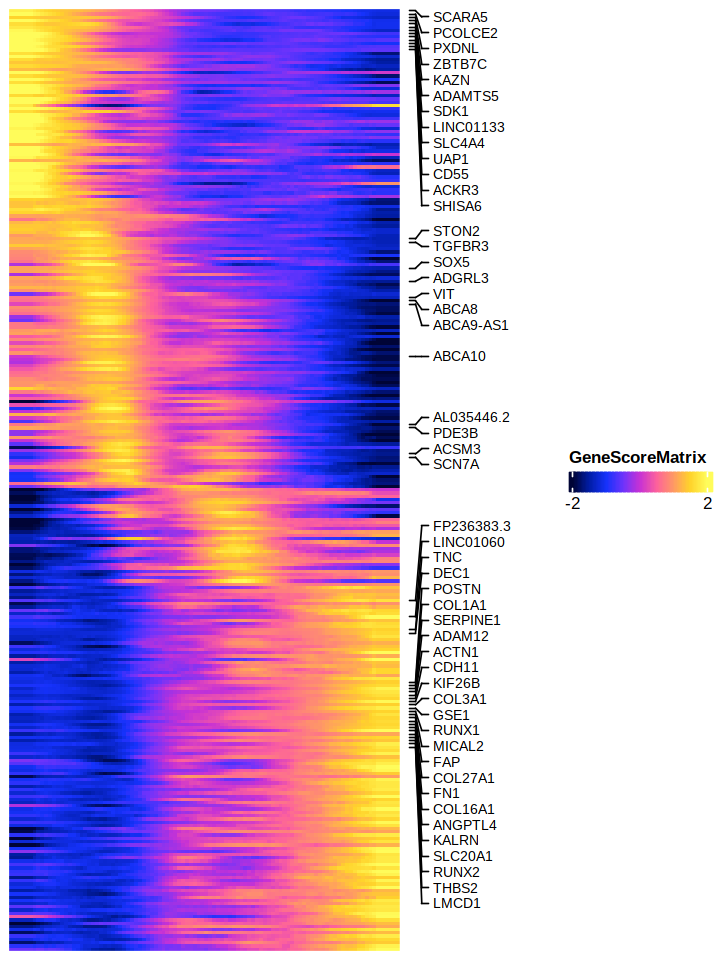

In [18]:
ht <- plotTrajectoryHeatmap(trajGEX,
                        varCutOff = 0.9,
                        pal = paletteContinuous(set = "horizonExtra"),
                        limits = c(-2, 2))

options(repr.plot.height = 8, repr.plot.width = 6)

ht

In [ ]:
matMM <- plotTrajectoryHeatmap(trajGEX, 
                            varCutOff = 0,
                            pal = paletteContinuous(set = "solarExtra"),
                            limits = c(-2, 2),
                              returnMatrix = TRUE)